## **(SUIM DATASET TRAINING)**
# **MUGHEERA SALEEM 361466**
# **AMMAR SHAH 362244**
# **MUHAMMAD NAUMAN 364573**

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 26.1 MB/s eta 0:00:00


# **Package imports**

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2 
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd
import os
import visualkeras
import sys
from PIL import Image
import time

# **Mounting g-drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Listing data directory**

In [ ]:
PATH = "/content/drive/MyDrive/DL Project Datasets/Segmentation Datasets/Underwater Semantic Segmentation"

train_img_names = os.listdir(os.path.join(PATH ,"train_val/images"))
print(train_img_names[0])
print(len(train_img_names))

test_img_names = os.listdir(os.path.join(PATH ,"TEST/images"))
print(test_img_names[0])
print(len(test_img_names))

f_r_1692_.jpg
1525
d_r_345_.jpg
110


# **Ordering all files**

In [ ]:
train_masks_names = []
test_masks_names = []

for string in train_img_names:
  string = string[:-3]+"bmp"
  #print(string)
  train_masks_names.append(string)

for string in test_img_names:
  string = string[:-3]+"bmp"
  #print(string)
  test_masks_names.append(string)

for i in range (3):
  print("Train image name:",train_img_names[i])
  print("Train mask name:",train_masks_names[i])
  print("Test image name:",test_img_names[i])
  print("Test mask name:",test_masks_names[i])

Train image name: f_r_1692_.jpg
Train mask name: f_r_1692_.bmp
Test image name: d_r_345_.jpg
Test mask name: d_r_345_.bmp
Train image name: f_r_1645_.jpg
Train mask name: f_r_1645_.bmp
Test image name: d_r_300_.jpg
Test mask name: d_r_300_.bmp
Train image name: f_r_160_.jpg
Train mask name: f_r_160_.bmp
Test image name: d_r_196_.jpg
Test mask name: d_r_196_.bmp


# **Reading traing images and masks and decoding them**

In [ ]:
train_images = []
train_masks = []

for index in range(len(train_img_names)):
   image = tf.io.read_file(os.path.join(PATH,"train_val", "images",train_img_names[index]))
   image = tf.image.decode_png(image, channels=3)
   image = tf.image.convert_image_dtype(image, tf.float32)
   image = np.asarray(image)
   image = tf.image.resize(image,(256, 256),method ='nearest')
   train_images.append(image)

   mask = tf.io.read_file(os.path.join(PATH,"train_val", "masks",train_masks_names[index]))
   mask = tf.image.decode_bmp(mask, channels=3)
   mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
   mask = np.asarray(mask)
   mask = tf.image.resize(mask,(256, 256),method ='nearest')
   train_masks.append(mask)
   print(index)

print("Number of training images:",len(train_images))
print("Number of training masks:",len(train_masks))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

# **Reading testing images and masks and decoding them**

In [ ]:
test_images = []
test_masks = []

for index in range(len(test_img_names)):
   image = tf.io.read_file(os.path.join(PATH,"TEST", "images",test_img_names[index]))
   image = tf.image.decode_png(image, channels=3)
   image = tf.image.convert_image_dtype(image, tf.float32)
   image = np.asarray(image)
   image = tf.image.resize(image,(256,256),method='nearest')
   test_images.append(image)

   mask = tf.io.read_file(os.path.join(PATH,"TEST", "masks",test_masks_names[index]))
   mask = tf.image.decode_bmp(mask, channels=3)
   mask = tf.math.reduce_max(mask, axis=-1, keepdims=True)
   mask = np.asarray(mask)
   mask = tf.image.resize(mask,(256,256),method='nearest')
   test_masks.append(mask)
   print(index)

print("Number of testing images:",len(test_images))
print("Number of testing masks:",len(test_masks))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
Number of testing images: 110
Number of testing masks: 110


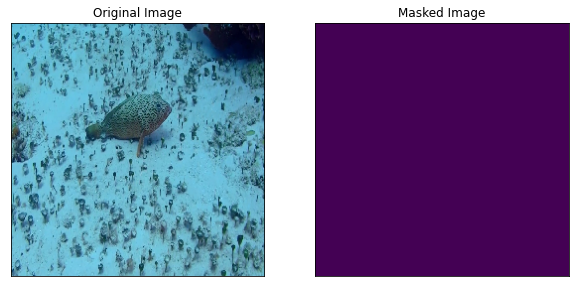

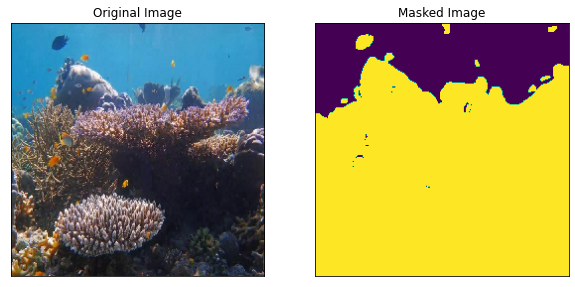

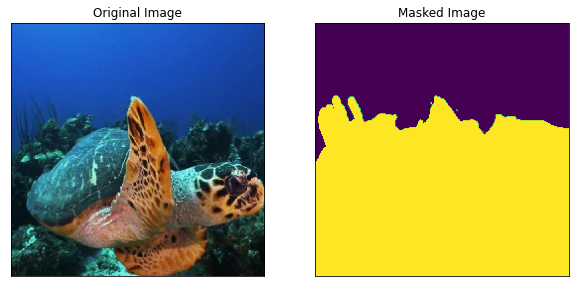

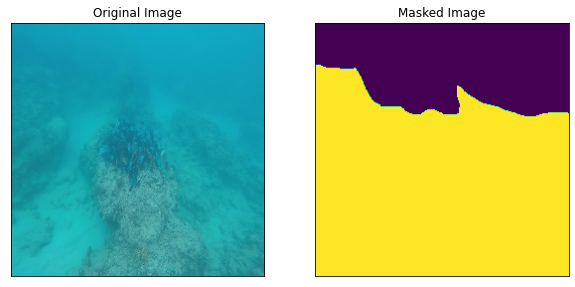

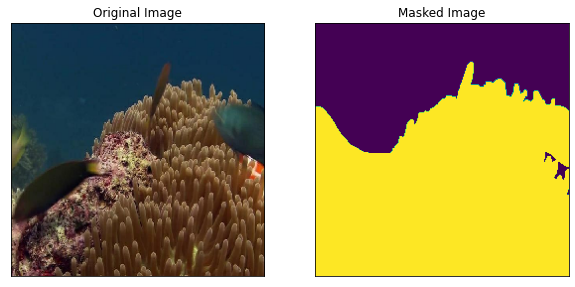

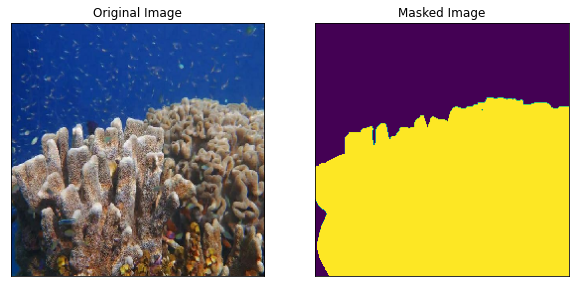

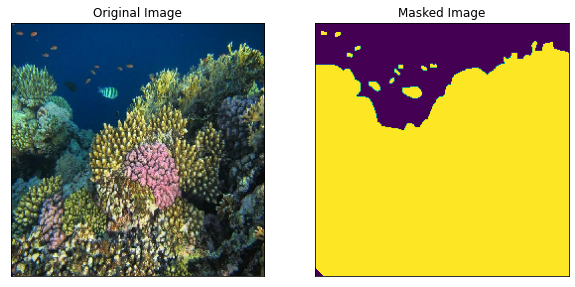

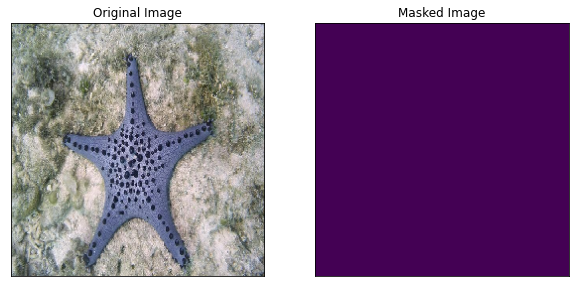

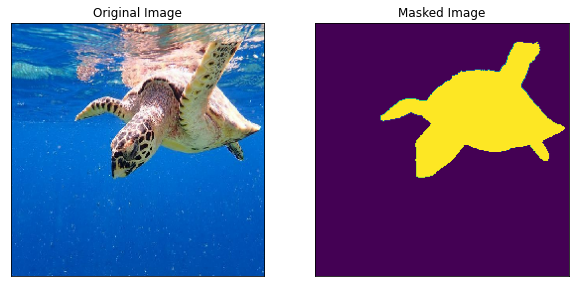

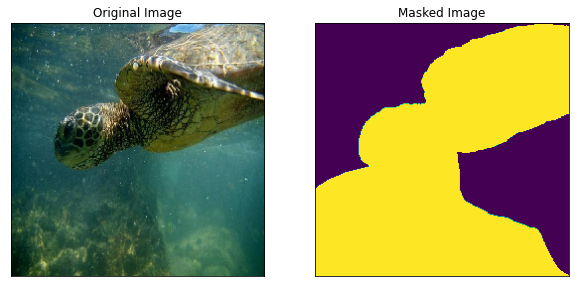

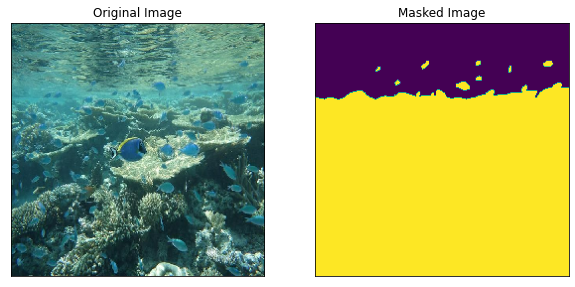

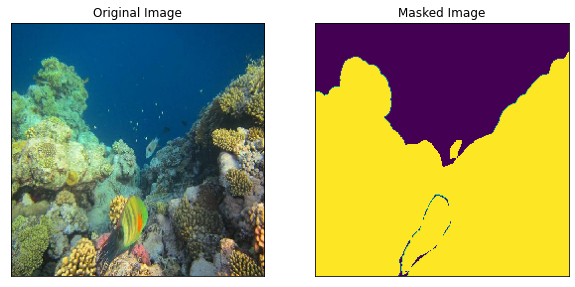

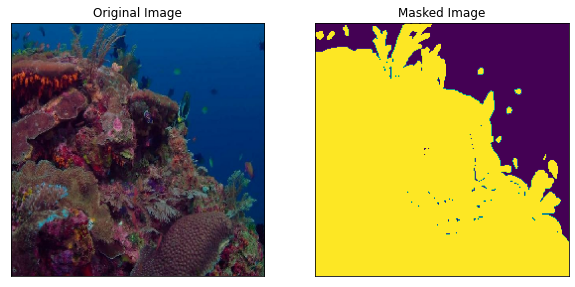

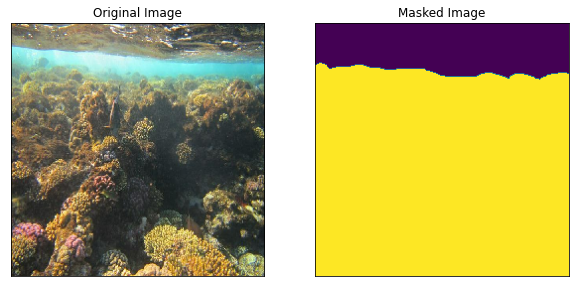

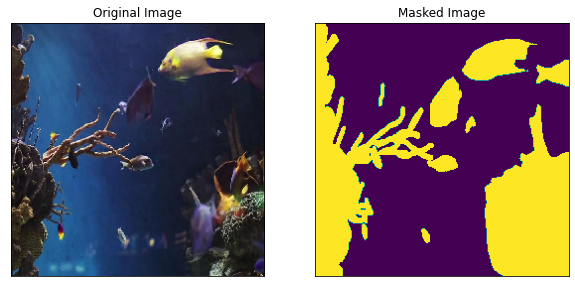

In [ ]:
N = 15

for index in range(N):
    
    image = train_images[index]
    mask = train_masks[index]

    plt.figure(figsize=(10, 10))
    
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])


    plt.subplot(1,2,2)
    plt.title("Masked Image")
    plt.imshow(tf.squeeze(mask))
    plt.xticks([])
    plt.yticks([])
    plt.show()

# **Printing tensor shapes**

In [ ]:
train_images = np.asarray(train_images)
train_masks = np.asarray(train_masks)
test_images = np.asarray(test_images)
test_masks = np.asarray(test_masks)

train_images = tf.stack(train_images,axis=0)
train_images = tf.stack(train_images,axis=0)
test_images = tf.stack(test_images,axis=0)
test_masks = tf.stack(test_masks,axis=0)

print(train_images.shape), print(train_masks.shape)
print(test_images.shape), print(test_masks.shape)

(1525, 256, 256, 3)
(1525, 256, 256, 1)
(110, 256, 256, 3)
(110, 256, 256, 1)


(None, None)

# **Loading first model**

In [ ]:
SUIM_1_model = tf.keras.models.load_model('/content/drive/MyDrive/SUIM_1')
SUIM_1_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

# **Loading second model**

In [ ]:
SUIM_2_model = tf.keras.models.load_model('/content/drive/MyDrive/DL Trained Models/SUIM_2_model')
SUIM_2_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  4736        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  50208       ['conv2d[0][0]']                 
                                )                                                             

# **Loading third model**

In [ ]:
SUIM_3_model = tf.keras.models.load_model('/content/drive/MyDrive/SUIM_3')
SUIM_3_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
# models = [SUIM_1_model,SUIM_2_model]

In [ ]:
# model_input = tf.keras.Input(shape=(352, 480, 3))

In [ ]:
# model_outputs = [SUIM_1_model.output,SUIM_2_model.output]

In [ ]:
# ensemble_output = tf.keras.layers.Average()(model_outputs)

In [ ]:
# ensemble_model = tf.keras.Model(inputs=[SUIM_1_model.input,SUIM_2_model.input], outputs=ensemble_output)

In [ ]:
# ensemble_model.summary()

# **Display helper function**

In [ ]:
def display(display_list):
    plt.figure(figsize=(20, 20))

    title = ["Input Image", "True Mask", "Predicted Mask"]

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]))
        plt.axis('off')
   
    plt.show()

# **Mask creating helper function**

In [ ]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

# **Ensambling and displaying results**

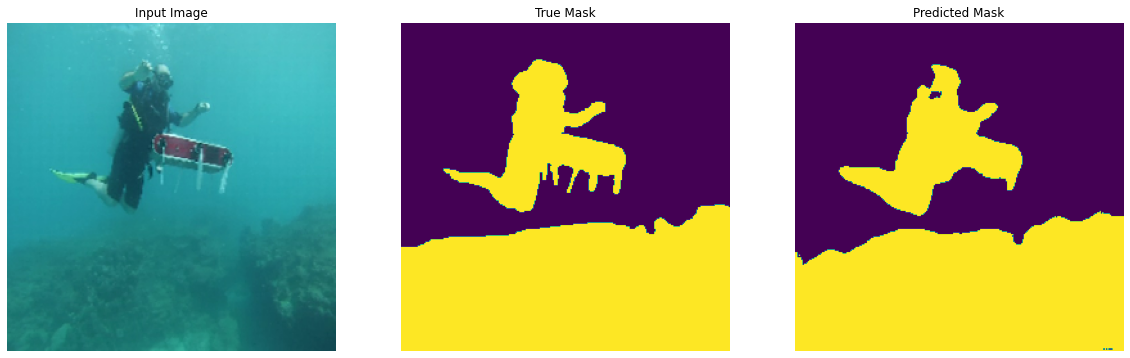

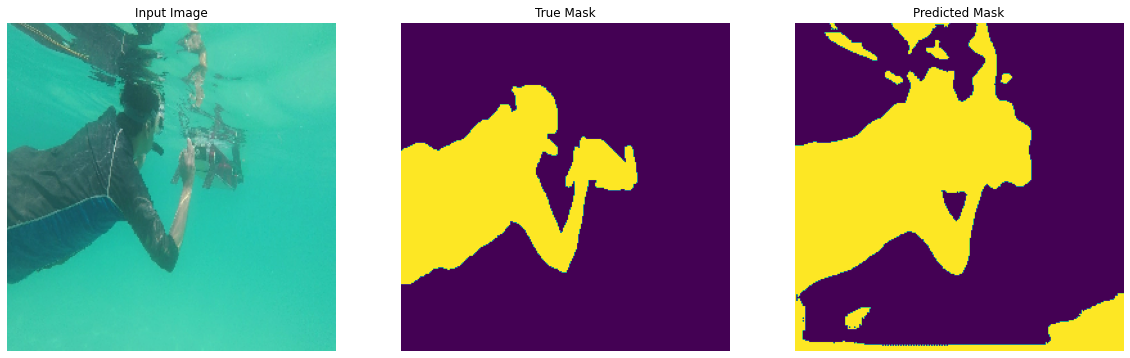

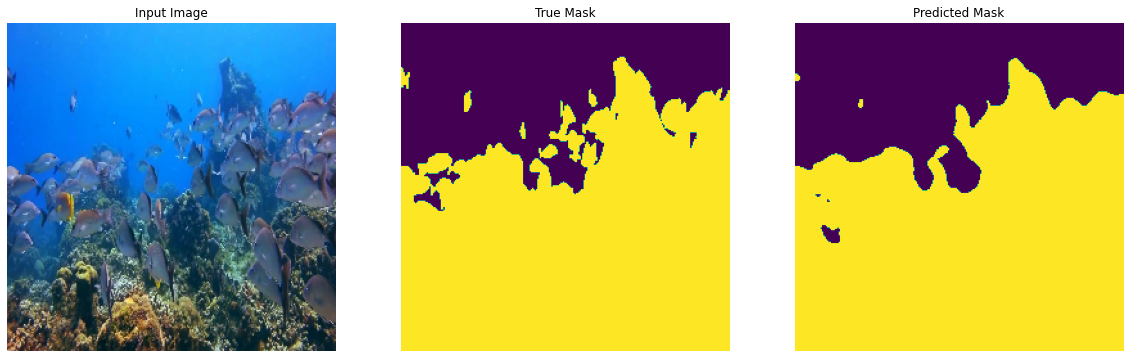

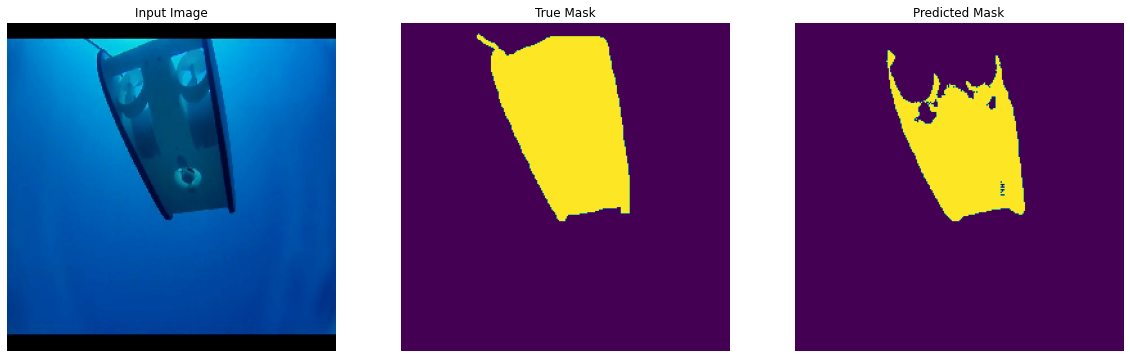

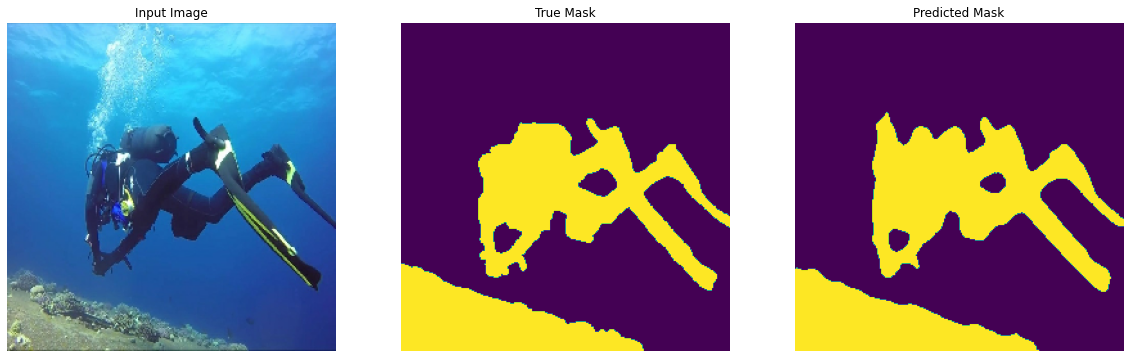

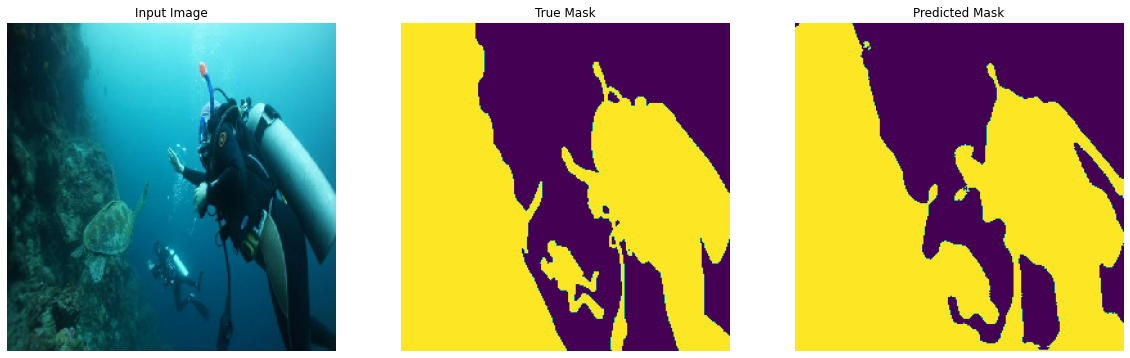

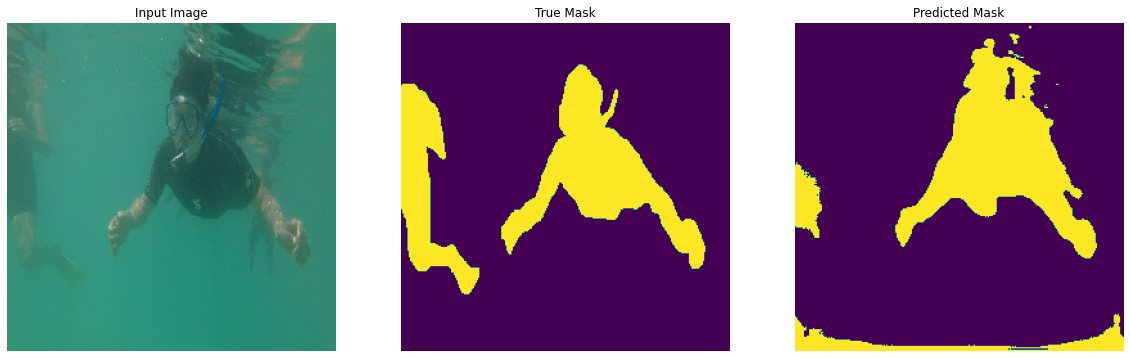

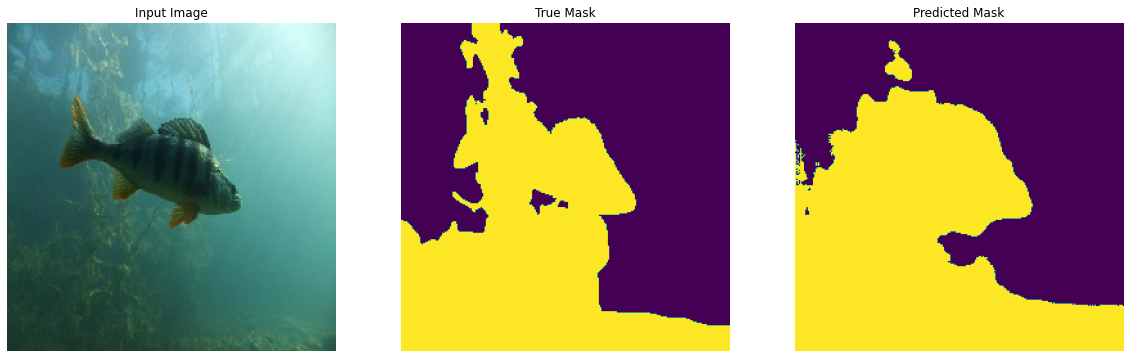

In [ ]:
for i in range(10,25,2):
    #index = np.random.randint(test_images.shape[0])
    index = i

    input_image = test_images[index]
    true_mask = test_masks[index]
    
    input_arr = tf.keras.preprocessing.image.img_to_array(input_image)
    input_arr = np.array([input_arr])


    pred_maks_1 = SUIM_1_model(input_arr)
    pred_maks_2 = SUIM_2_model(input_arr)
    pred_maks_3 = SUIM_3_model(input_arr)
    
    pred_mask = np.mean( np.array([ 0.5*pred_maks_1,0.2* pred_maks_2,0.1* pred_maks_3 ]), axis=0 )
    pred_mask = create_mask(pred_mask)

    display([input_image, true_mask, pred_mask])

In [ ]:
# outputs = [model.predict() for model in models]